In [30]:
import numpy as np 
import matplotlib.pylab as plt 
from getdist import plots, MCSamples
from utils.helpers import pickle_load

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 15

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
color1 = '#50C878' #'#B5CA8D'
color3 = '#222E50'
alpha = 0.9
palefactor = 0.9
linewidth = 2 
contours = [0.68,0.95]

In [2]:
labels = [r'$\sigma_{8}$', r'$\Omega_{c}$', r'$\Omega_{b}$', r'$h$', r'$n_{s}$',
          r'$m_{1}$', r'$m_{2}$', r'$m_{3}$', r'$m_{4}$', 
          r'$\delta z_{1}^{(s)}$', r'$\delta z_{2}^{(s)}$', r'$\delta z_{3}^{(s)}$', r'$\delta z_{4}^{(s)}$',
          r'$A_{IA}$', r'$\eta$', r'$b_{1}$', r'$b_{2}$', r'$b_{3}$', r'$b_{4}$', r'$b_{5}$',
         r'$\delta z_{1}^{(g)}$', r'$\delta z_{2}^{(g)}$', r'$\delta z_{3}^{(g)}$', r'$\delta z_{4}^{(g)}$', r'$\delta z_{5}^{(g)}$']

In [3]:
labels_cosmo = labels[0:5]
labels_multiplicative = labels[5:9]
labels_shift_shear = labels[9:13]
labels_intrinsic = labels[13:15]
labels_bias = labels[15:20]
labels_shift_galaxy = labels[20:]

In [4]:
KEYS = ['sigma8', 'Omegac', 'Omegab', 'hubble', 'ns',
        'm1', 'm2', 'm3', 'm4',
        'dz_wl_1', 'dz_wl_2', 'dz_wl_3', 'dz_wl_4',
        'a_ia', 'eta',
        'b1', 'b2', 'b3', 'b4', 'b5', 
        'dz_gc_1', 'dz_gc_2', 'dz_gc_3', 'dz_gc_4', 'dz_gc_5']

In [5]:
def triangle_plot(mcmc_samples, labels, subplot_size = 2, font_size = 18, fname = None):
    ndim = len(labels)
    colour = 'green'
    names = ["x%s"%i for i in range(ndim)]
    samples = MCSamples(samples=mcmc_samples,names = names, labels = labels, settings = settings)
    
    G = plots.getSubplotPlotter(subplot_size=subplot_size)
    samples.updateSettings({'contours': contours})
    G.settings.solid_contour_palefactor = 0.9
    G.settings.alpha_filled_add = 0.6
    G.settings.num_plot_contours = 2
    G.triangle_plot(samples, filled = True, line_args={'lw':linewidth, 'color':colour}, contour_colors=[colour])
    
    for i in range(0,ndim):
        for j in range(0, i+1):
            if i != j:
                ax = G.subplots[i,j]

                a, b = G.get_param_array(samples, ['x'+str(j), 'x'+str(i)])
                density = G.sample_analyser.get_density_grid(samples, a, b)
                density.contours = density.getContourLevels(contours)
                contour_levels = density.contours

                ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = colour, linewidths = linewidth) 
                ax.tick_params(axis = 'x', labelsize = font_size, rotation=45, pad=5)
                ax.tick_params(axis = 'y', labelsize = font_size, pad=5)
                ax.yaxis.label.set_size(font_size)
                ax.xaxis.label.set_size(font_size)
                ax.xaxis.labelpad = 20
                ax.yaxis.labelpad = 20
            else:
                ax = G.subplots[i,j]   

                dense = samples.get1DDensity('x'+str(i))
                dense.normalize(by='max')
                ax.plot(dense.x, dense.P, lw = linewidth+2, c = colour)

                ax.tick_params(axis = 'x', labelsize = font_size, rotation=45, pad=5)
                ax.tick_params(axis = 'y', labelsize = font_size, pad=5)
                ax.yaxis.label.set_size(font_size)
                ax.xaxis.label.set_size(font_size)
                ax.xaxis.labelpad = 20
                ax.yaxis.labelpad = 20
    if fname is not None:
        os.makedirs('plots', exist_ok=True)
        plt.savefig(f'plots/triangle_plot_{fname}.pdf', bbox_inches = 'tight')
    plt.close()

### Emulator Samples - EMCEE

In [6]:
emulator_1 = pickle_load('samples', 'emulator_emcee_1')
emulator_2 = pickle_load('samples', 'emulator_emcee_2')

emulator_samples_1 = emulator_1.get_chain(discard = 1000, thin = 30, flat = True) 
emulator_samples_2 = emulator_2.get_chain(discard = 1000, thin = 30, flat = True)

emulator_samples_emcee = np.concatenate([emulator_samples_1, emulator_samples_2], axis = 0)

### Emulator Samples - NUTS

In [7]:
emulator_nuts = pickle_load('samples', 'emulator_nuts_small_ss_high_td')
emulator_samples_nuts = np.asarray([np.asarray(emulator_nuts.get_samples()[key]) for key in KEYS]).T

### JAX-COSMO Samples - EMCEE

In [8]:
jaxcosmo_1 = pickle_load('samples', 'jaxcosmo_emcee_1')
jaxcosmo_2 = pickle_load('samples', 'jaxcosmo_emcee_2')

jaxcosmo_samples_1 = jaxcosmo_1.get_chain(discard = 1000, thin = 30, flat = True) 
jaxcosmo_samples_2 = jaxcosmo_2.get_chain(discard = 1000, thin = 30, flat = True)

jaxcosmo_samples_emcee = np.concatenate([jaxcosmo_samples_1, jaxcosmo_samples_2], axis = 0)

### JAX-COSMO Samples - NUTS

In [9]:
jaxcosmo_nuts = pickle_load('samples', 'jaxcosmo_nuts_small_ss_high_td')
jaxcosmo_samples_nuts = np.asarray([np.asarray(jaxcosmo_nuts.get_samples()[key]) for key in KEYS]).T

## Plots

In [25]:
# emulator_samples_emcee, emulator_samples_nuts, jaxcosmo_samples_emcee, jaxcosmo_samples_nuts

mcmc_samples_1 = emulator_samples_emcee[:,0:5] # emulator_samples_nuts[:,0:5] # 
mcmc_samples_2 = emulator_samples_nuts[:,0:5] # jaxcosmo_samples_nuts[:,0:5] # 

label_1 = 'Emulator and EMCEE' # 'Emulator and NUTS'
label_2 = 'Emulator and NUTS' # 'JAX-COSMO and NUTS'

In [26]:
ndim = len(labels_cosmo)
names = ["x%s"%i for i in range(ndim)]

samples_1 = MCSamples(samples=mcmc_samples_1,names = names, labels = labels_cosmo, settings = settings, label = label_1)
samples_2 = MCSamples(samples=mcmc_samples_2,names = names, labels = labels_cosmo, settings = settings, label = label_2)

Removed no burn in
Removed no burn in


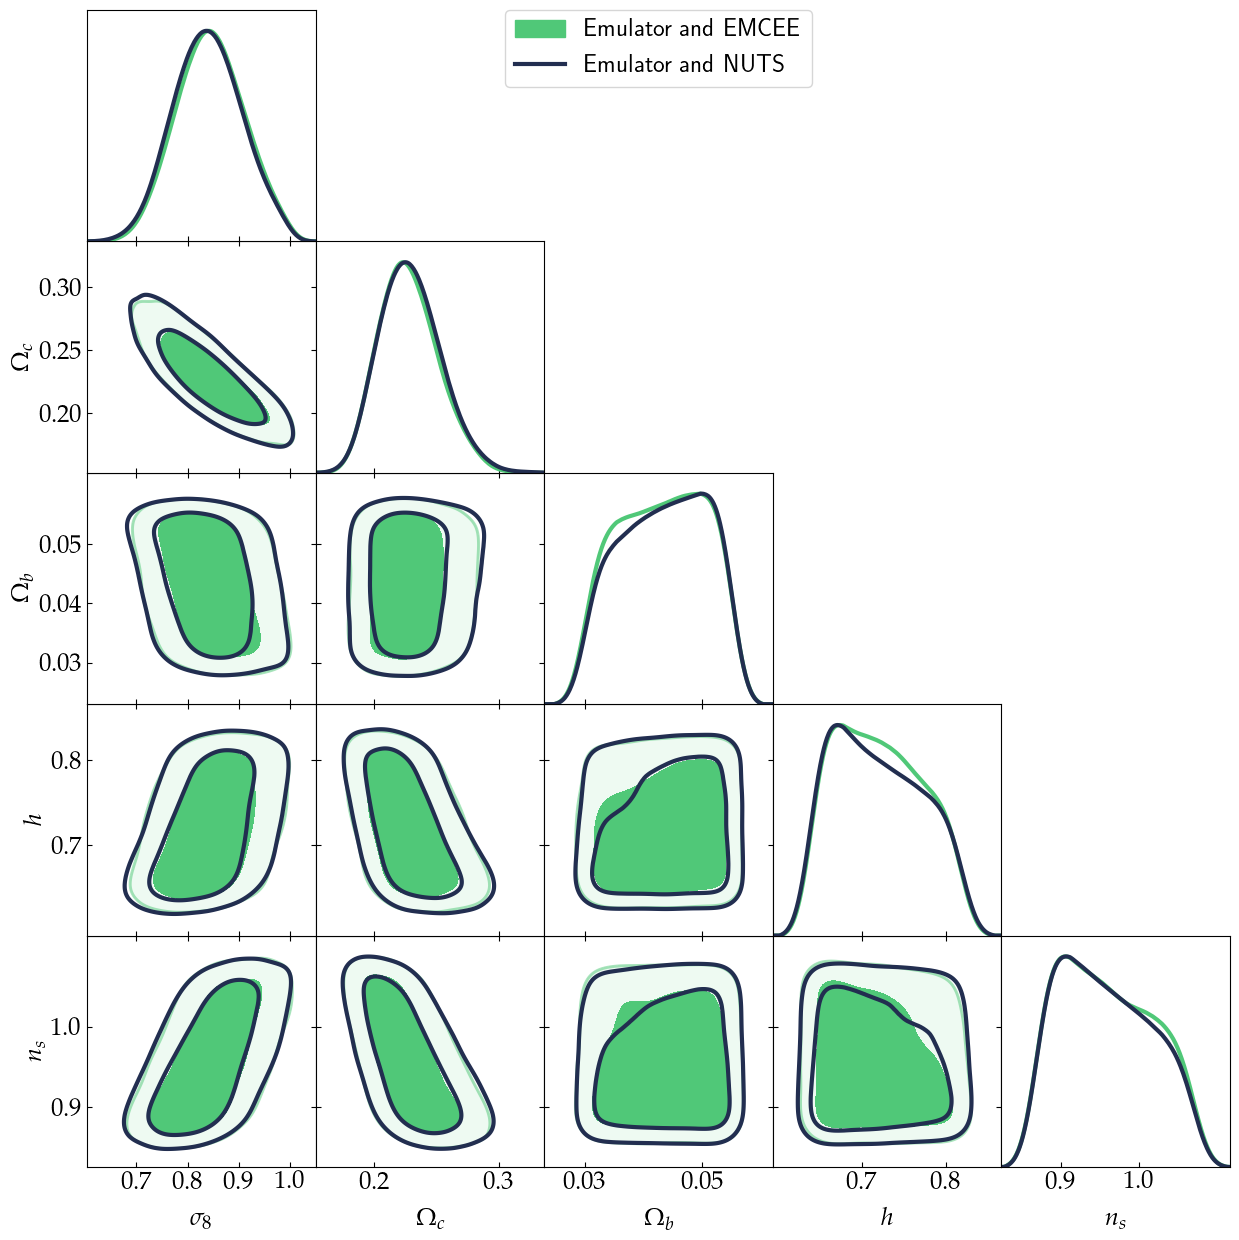

In [32]:
G = plots.getSubplotPlotter(subplot_size=2.5)
G.settings.solid_contour_palefactor = palefactor
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 20
G.settings.lab_fontsize = 20
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize =  20
samples_1.updateSettings({'contours': [0.68, 0.95]})
samples_2.updateSettings({'contoburs': [0.68, 0.95]})
G.triangle_plot([samples_1, samples_2], filled = [True,False], contour_colors=[color1, color3], contour_lws=[3,3], contour_ls=['-', '-'])
# plt.savefig('plots/triangle_plot_comparison.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()